In [1]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np

In [2]:
dic_threebody = {'twoearth_sun':
                    {'rolaction' : np.array([[1,0,0],[-1,0,0],[0,0,0]]),
                     'velocity' : np.array([[0,0,1],[0,0,-1],[0,0.01,0]]),
                     'mass' : np.array([1,1,333000]),
                    'K1' : 1.872234653620846e-05,
                    'K2' : 6.3241541850162},
                } # อย่างเก็บไรเอามาใส่ตรงนี้

In [3]:
import scipy.integrate

r = dic_threebody['twoearth_sun']['rolaction']
v = dic_threebody['twoearth_sun']['velocity']
m = dic_threebody['twoearth_sun']['mass']
K1 = dic_threebody['twoearth_sun']['K1']
K2 = dic_threebody['twoearth_sun']['K2']
class twobody:
    def __init__(self,m=None,r=None,v=None,K1=None,K2=None): #v,r is array 2D(3,3) m is array (3,)
        self.r = r
        self.v = v
        self.m = m
        self.K1 = K1
        self.K2 = K2
        self.params = np.concatenate((self.r,self.v),axis=None)
        self.time_span = np.linspace(0,20,500)

In [4]:
#A function defining the equations of motion 
def ThreeBodyEqtion(y0,t,m=m,K1=K1,K2=K2):
    r1 = y0[:3]
    r2 = y0[3:6]
    r3 = y0[6:9]
    v1 = y0[9:12]
    v2 = y0[12:15]
    v3 = y0[15:18]
    r12 = np.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    r13 = np.linalg.norm(r3-r1) #Calculate magnitude or norm of vector
    r23 = np.linalg.norm(r3-r2) #Calculate magnitude or norm of vector
    # ปลาย - ต้น
    dv1bydt=K1*m[1]*(r2-r1)/r12**3+K1*m[2]*(r3-r1)/r13**3
    dv2bydt=K1*m[0]*(r1-r2)/r12**3+K1*m[2]*(r3-r2)/r23**3
    dv3bydt=K1*m[0]*(r1-r3)/r13**3+K1*m[1]*(r2-r3)/r23**3

    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3

    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r_derivs,dr3bydt))

    v_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v_derivs,dv3bydt))

    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs

In [5]:
model = twobody(r=r,v=v,m=m,K1=K1,K2=K2)
import scipy.integrate
three_body_sol = sci.integrate.odeint(ThreeBodyEqtion,model.params,model.time_span)

In [6]:
r1_sol=three_body_sol[:,:3].T.reshape(3,-1)
r2_sol=three_body_sol[:,3:6].T.reshape(3,-1)
r3_sol=three_body_sol[:,6:9].T.reshape(3,-1)

<IPython.core.display.Javascript object>


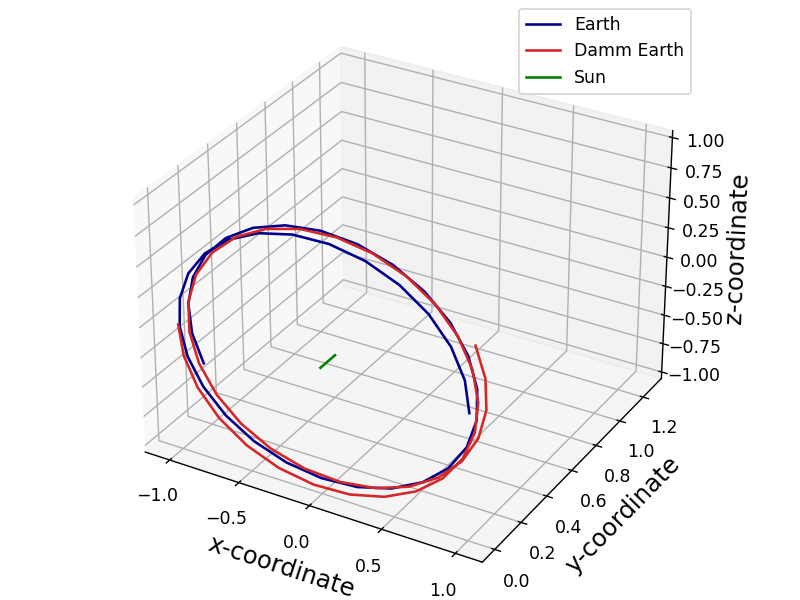

C:\Users\NATTAK~1\AppData\Local\Temp/ipykernel_3704/804600512.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Visualization of orbits of stars in a two-body system\n')

In [7]:
%matplotlib notebook
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])
    return line
t = r1_sol[2]
x = r1_sol[0]
y = r1_sol[1]
#--------------------------------------------------------------------------------
t2 = r2_sol[2]
x2 = r2_sol[0]
y2 = r2_sol[1]
#------------------------------------------------------------------------------
t3 = r3_sol[2]
x3 = r3_sol[0]
y3 = r3_sol[1]

dataSet1 = np.array([x, y, t])
dataSet2 = np.array([x2, y2, t2])
dataSet3 = np.array([x3, y3, t3])
numdatapoint = len(r1_sol)
fig=plt.figure()
ax = Axes3D(fig)
line1 = ax.plot(r1_sol[0],r1_sol[1],r1_sol[2],color="darkblue",label='Earth')[0]
line2 = ax.plot(r2_sol[0],r2_sol[1],r2_sol[2],color="tab:red",label='Damm Earth')[0]
line3 = ax.plot(r3_sol[0],r3_sol[1],r3_sol[2],color="green",label='Sun')[0]
ax.legend()
interval= 2
line_ani1 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet1,line1), interval=interval, blit=True)
line_ani2 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet2,line2), interval=interval, blit=True)
line_ani3 = animation.FuncAnimation(fig, func, frames=500, fargs=(dataSet3,line3), interval=interval, blit=True)

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)